# Mathematics for Machine Learning
## Coursework 1

In [1]:
# question 1, part (c) - diff function 1

def grad_f1(x):
    # x is R^2
    x1 = x[0]
    x2 = x[1]
    
    # partial derivatives
    f1 = 8*x1 - 2*x2 - 1
    f2 = 8*x2 - 2*x1 - 1
    
    return [f1, f2]


In [2]:
import numpy as np

# question 1, part (d) - diff function 2

def grad_f2(x):
    # x is R^2
    x1 = x[0]
    x2 = x[1]
    
    # partial derivatives
    f1 = 2*(x1 -1)*np.cos(x1**2+x2**2-2*x1+1) + 6*x1 - 2*x2 - 2
    f2 = 2*(x2)*np.cos(x1**2+x2**2-2*x1+1) + 6*x2 - 2*x1 + 6
    
    return [f1, f2]

In [3]:
from autograd import grad

In [4]:
# function 1 diff with autograd for comparison

B = np.array([[3,-1],[-1,3]])
a = np.array([1,0])
b = np.array([0,-1])

def f1(x):
    return np.dot(x.T,x) + np.dot(x.T,np.dot(B,x)) - np.dot(a.T,x) + np.dot(b.T,x)

grad_f_1 = grad(f1)
grad_f_1(np.array([1/6,1/6]))

array([5.55111512e-17, 5.55111512e-17])

In [5]:
# function 2 diff with autograd for comparison

import autograd.numpy as an

def f2(x):
    return an.sin(np.dot((x-a).T,(x-a))) + np.dot((x-b).T,np.dot(B,(x-b)))

grad_f_2 = grad(f2)
grad_f_2(np.array([1.0,1.0]))

array([ 2.        , 11.08060461])

In [6]:
# Function 3 defined

def f3(x):
    return 1 - ((an.exp(-np.dot((x-a).T,(x-a))))
                + an.exp(-np.dot((x-b).T,np.dot(B,(x-b))))
                - (1/10)*an.log(an.linalg.det((an.identity(2)/100+np.dot(x,x.T)))))

In [7]:
# Gradient descent method for function 2

def grad_desc_f2(x0,N,alpha):
    x = x0
    f_2 = f2(x0)
    result = []
    coordinates = []
    result.append(f_2)
    coordinates.append(x0)
    count = 0
    
    while count < N and f_2 != 0 and f_2 < 100:
        # calculate gradient
        gradient = grad(f2)
        new_grad = gradient(x)
        
        # update parameters
        x = x - alpha*new_grad
        f_2 = f2(x)
        result.append(f_2)
        coordinates.append(x)
        count += 1
    
    return result, coordinates, count

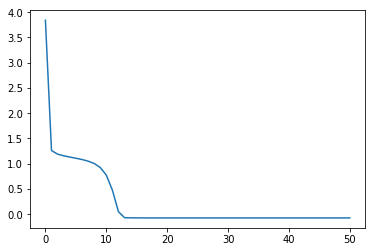

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

x0 = np.array([1.0,-1.0])

x = np.linspace(0,50,num=51)
y_2, coord_2, iterations_2 = grad_desc_f2(x0,50,0.1)
plt.plot(x,y_2)
plt.show()

## Contour plot of gradient descent method for function 2

In [9]:
def contour_plot_f2(x0,N,alpha,grid_size, N_contours,title=False,name=''):
    y, coord, iterations = grad_desc_f2(x0,N,alpha)
    x1_range = np.linspace(coord[-1][0]-grid_size,coord[-1][0]+grid_size,20)
    x2_range = np.linspace(coord[-1][1]-grid_size,coord[-1][1]+grid_size,20)
    X1, X2 = np.meshgrid(x1_range,x2_range)
    zs = np.array([f2(x) for x in zip(np.ravel(X1), np.ravel(X2))])
    Z = zs.reshape(X1.shape)
    plt.figure()
    plt.contour(X1,X2,Z,N_contours)
    plt.plot([t[0] for t in coord],[t[1] for t in coord],color='r',label='path of gradient descent')
    if title:
        plt.title(name,fontsize=12,loc='center',fontweight='bold')
    plt.xlabel('x',fontsize=12)
    plt.ylabel('y',fontsize=12)
    plt.legend(loc='upper right')
    save_name = name + '.png'
    plt.savefig(save_name)
    plt.show()

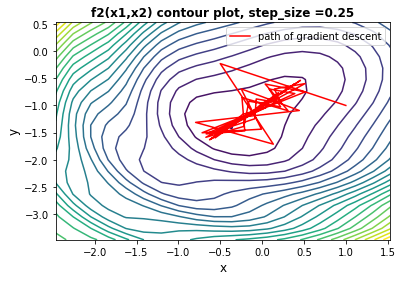

In [10]:
step = 0.25
contour_plot_f2(x0,50,step,2, 25,title=True,name='f2(x1,x2) contour plot, step_size =' + str(step))

## Contour plot of gradient descent method for function 3

In [11]:
def grad_desc_f3(x0,N,alpha):
    x = x0
    f_3 = f3(x0)
    result = [f_3]
    coordinates = [x0]
    count = 0
    
    while count < N and f_3 != 0:
        # calculate gradient
        gradient = grad(f3)
        new_grad = gradient(x)
        
        # update parameters
        x = x - alpha*new_grad
        f_3 = f3(x)
        result.append(f_3)
        coordinates.append(x)
        count += 1
    
    return result, coordinates, count

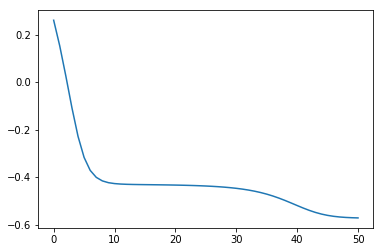

In [12]:
x = np.linspace(0,50,num=51)
y_3, coord_3, iterations_3 = grad_desc_f3(x0,50,0.1)
plt.plot(x,y_3)
plt.show()

In [13]:
def contour_plot_f3(x0,N,alpha,grid_size, N_contours,title=False,name=''):
    y, coord, iterations = grad_desc_f3(x0,N,alpha)
    x1_range = np.linspace(coord[-1][0]-grid_size,coord[-1][0]+grid_size,20)
    x2_range = np.linspace(coord[-1][1]-grid_size,coord[-1][1]+grid_size,20)
    X1, X2 = np.meshgrid(x1_range,x2_range)
    zs = np.array([f3(np.array(x)) for x in zip(np.ravel(X1), np.ravel(X2))])
    Z = zs.reshape(X1.shape)
    plt.figure()
    plt.contour(X1,X2,Z,N_contours)
    plt.plot([t[0] for t in coord],[t[1] for t in coord],color='r',label='path of gradient descent')
    if title:
        plt.title(name,fontsize=12,loc='center',fontweight='bold')
    plt.xlabel('x',fontsize=12)
    plt.ylabel('y',fontsize=12)
    plt.legend(loc='upper right')
    save_name = name + '.png'
    plt.savefig(save_name)
    plt.show()

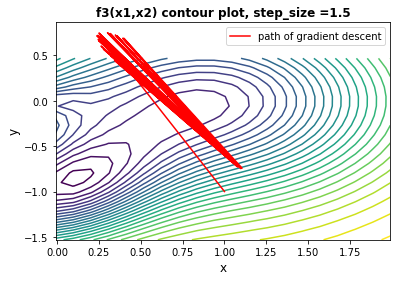

In [14]:
step = 1.5
contour_plot_f3(x0,50,step,1, 30, title=True,name='f3(x1,x2) contour plot, step_size =' + str(step))